# 1. Dataset Selection

In [469]:
import pandas as pd

# Load the dataset
file_path = 'amsterdam_weekdays.csv'  # Replace with your dataset path
dtf  = pd.read_csv(file_path)

# Display basic info about the dataset
dtf.columns = dtf.columns.str.replace(' ', '')
dtf.head()

,Unnamed:0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [470]:
dtf.describe()


,Unnamed:0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1103.000000,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081,4.891158,52.364858
std,318.552978,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400,0.038882,0.019467
min,0.000000,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,275.500000,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772,4.871000,52.354580
50%,551.000000,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084,4.890010,52.365590
75%,826.500000,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846,4.907315,52.375260
max,1102.000000,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


# 2. Data Analysis (Visualizations)


in this part we will understand the target variable (realSum - price) and its relationships with other attributes.

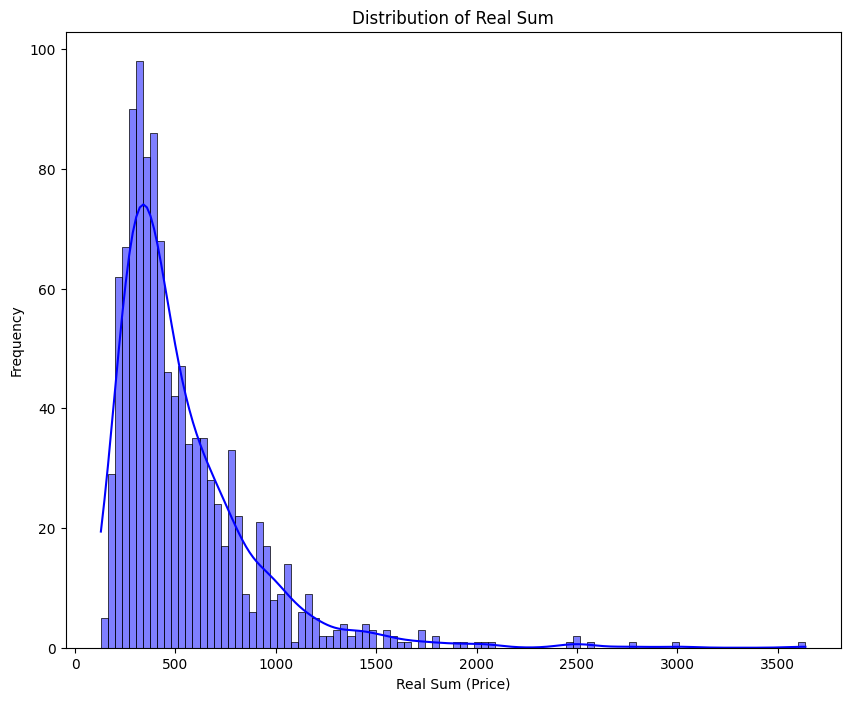

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only prices <= 2000
filtered_data = dtf[dtf['realSum'] <= 7000]

# Distribution of realSum
plt.figure(figsize=(10, 8))
sns.histplot(filtered_data['realSum'], kde=True, bins=100, color='blue')
plt.title('Distribution of Real Sum')
plt.xlabel('Real Sum (Price)')
plt.ylabel('Frequency')
plt.show()

### 1. **Distribution of Real Sum**

**Why is this Feature Significant?**
realSum is the target variable representing the price of listings. Understanding its distribution is crucial for analyzing trends, identifying typical price ranges, and spotting anomalies or outliers. This information provides foundational insights into pricing behavior across all listings.

**Why is it Chosen as a Key Visualization?**
The histogram highlights the skewed nature of the pricing data, where most listings have prices below 1000, with fewer high-priced listings extending beyond this range. It also emphasizes the presence of outliers, helping us understand the variability and concentration of prices.

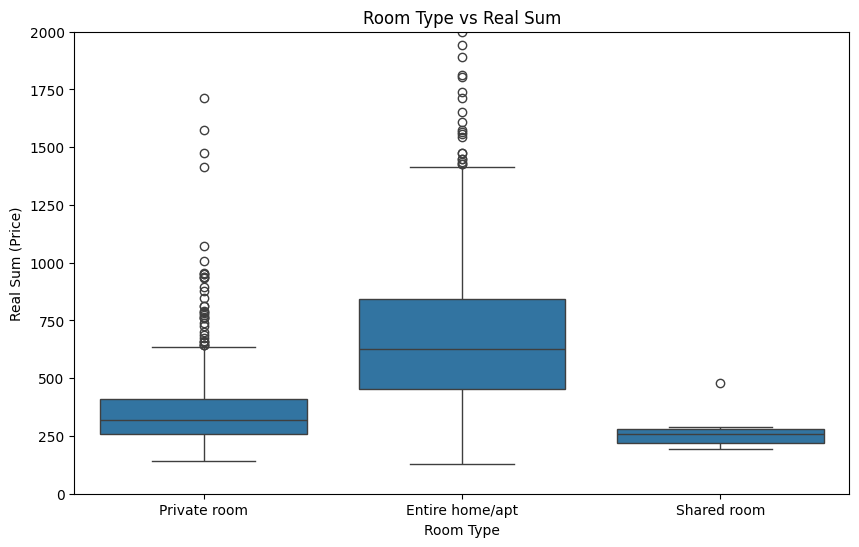

In [472]:
# Room Type vs Real Sum
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='realSum', data=dtf, hue=None)
plt.ylim(0, 2000)

plt.title('Room Type vs Real Sum')
plt.xlabel('Room Type')
plt.ylabel('Real Sum (Price)')
plt.show()


### 2. **Room Type vs Real Sum**

**Why is this Feature Significant?**
Room type plays a major role in determining listing prices. By comparing shared rooms, private rooms, and entire homes, we can see how different accommodation types influence pricing. This helps us understand which types of listings tend to be priced higher and why.

**Why is it Chosen as a Key Visualization?**
The boxplot shows that entire homes/apartments not only have the highest median prices but also a much wider range, indicating variation in luxury or size(we cannot really know as this isn't part of the features, but it could be nice addition if it was). On the other hand, shared rooms have the lowest prices with very little variability, highlighting how privacy and space significantly affect pricing.

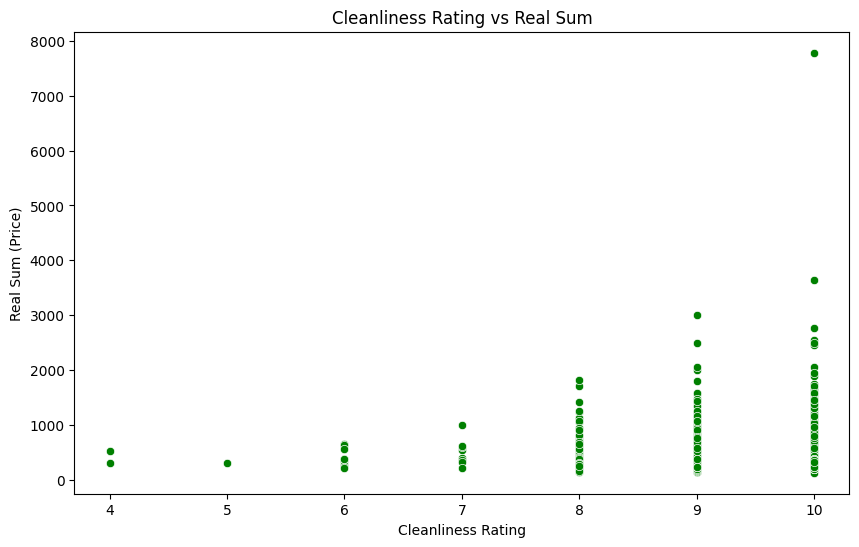

In [473]:
# Cleanliness Rating vs Real Sum
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cleanliness_rating', y='realSum', data=dtf, color='green')
plt.title('Cleanliness Rating vs Real Sum')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Real Sum (Price)')
plt.show()


### 3. **Cleanliness Rating vs Real Sum**

**Why is this Feature Significant?**
Cleanliness is a key aspect of guest satisfaction, often influencing the perceived value of a property. Its relationship with realSum can reveal whether cleanliness affects pricing decisions and guest expectations.

**Why is it Chosen as a Key Visualization?**
The scatterplot shows a positive relationship between cleanliness ratings and prices, with higher ratings correlating with higher prices. This suggests that cleanliness is valued by hosts and influences pricing decisions.

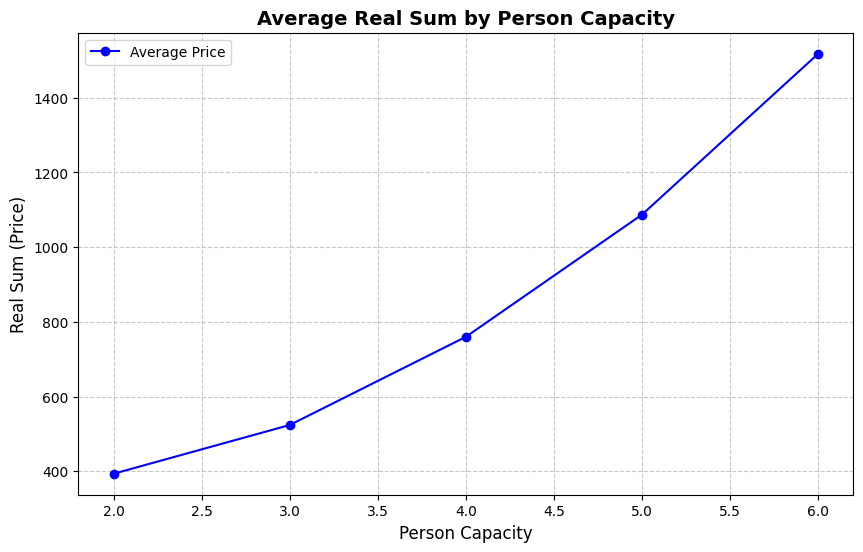

In [474]:
import matplotlib.pyplot as plt

# Group data by person capacity and calculate mean prices
grouped_data = dtf.groupby('person_capacity')['realSum'].mean()
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', color='blue', label='Average Price')
plt.title('Average Real Sum by Person Capacity', fontsize=14, fontweight='bold')
plt.xlabel('Person Capacity', fontsize=12)
plt.ylabel('Real Sum (Price)', fontsize=12)

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()





### 4. **Average Real Sum by Person Capacity**

**Why is this Feature Significant?**
Person capacity reflects the number of guests a listing can accommodate. It directly correlates with pricing, as listings that can host more guests typically charge higher rates. Analyzing this relationship is crucial for understanding the role of guest capacity in pricing strategies.

**Why is it Chosen as a Key Visualization?**
The line plot clearly demonstrates a positive trend, where average prices increase steadily with higher person capacities. This trend validates the hypothesis that accommodating more guests leads to higher pricing.

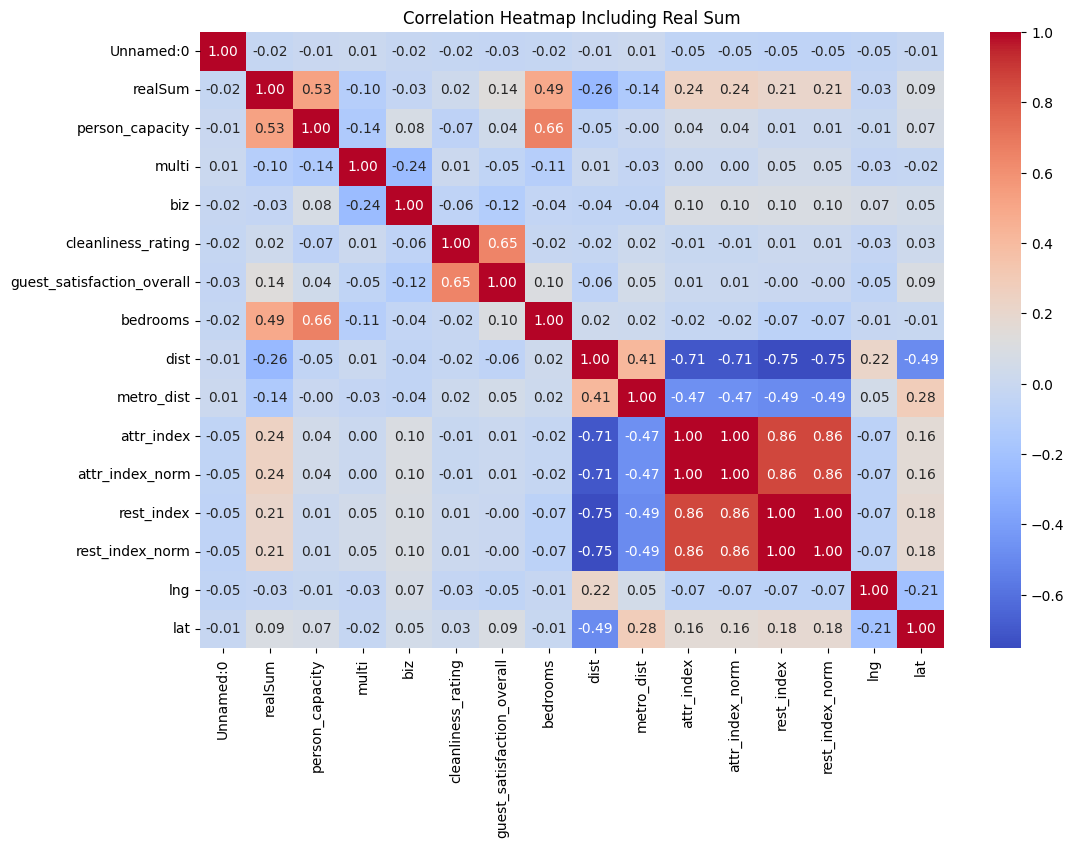

In [475]:
# Select only numeric columns
numeric_columns = dtf.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including Real Sum')
plt.show()


### 5. **Correlation Heatmap Including Real Sum**

**Why is this Feature Significant?**
Correlation analysis is essential for understanding how numerical features relate to the target variable (`realSum`). It helps us identify which features have the strongest influence on pricing and whether any features are redundant or irrelevant, aiding in feature selection and model optimization.

**Why is it Chosen as a Key Visualization?**
The heatmap highlights important relationships, such as the positive correlation between `person_capacity` and `realSum` (0.53) and the negative correlation between `dist` and `realSum` (-0.26), showing that listings further from the city center tend to be cheaper. It also identifies highly correlated features like `attr_index` and `attr_index_norm`, which might introduce redundancy in modeling. This insight helps refine the dataset and improve predictive accuracy.

# 3. Basic Model Pipeline

In [476]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

# Preprocess the data
df_processed = pd.get_dummies(dtf, columns=['room_type'], drop_first=True)

# Define target variable and features
X = df_processed.drop(['realSum'], axis=1)
y = df_processed['realSum']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
# Initialize the XGBoost Regressor
xgb_model  = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1)

# Train the model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


# 4. Error Analysis


### 1. R2 Score Test
we will run an R2 score test to evaluate the performance of the model, as we saw on class.
The R2 score, also known as the coefficient of determination, measures how well the model explains the variance in the target variable (realSum). This score provides a clear way to assess the model's effectiveness.


In [477]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")


R2 Score: 0.54


### 2. Residual Analysis

Residuals are the differences between the actual and predicted values. By analyzing residuals, we can identify patterns, outliers, or systematic biases.



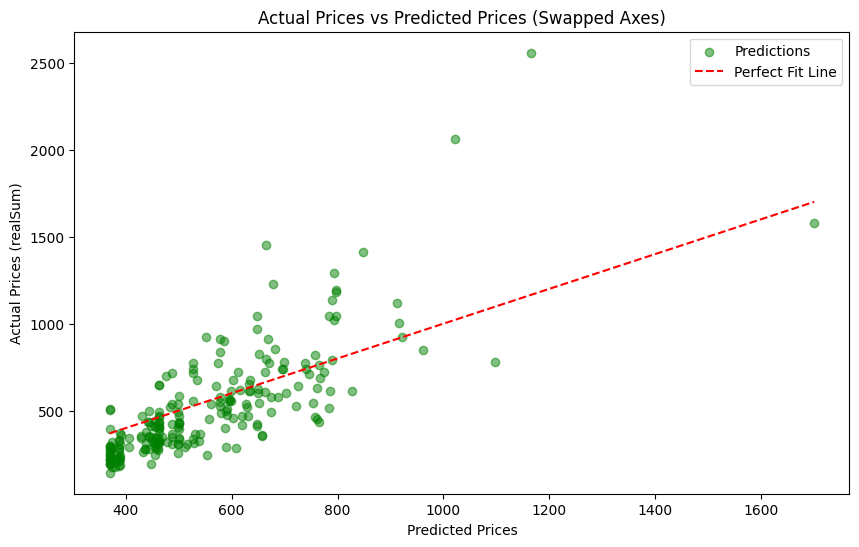

In [478]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred
# Actual Prices vs Predicted Prices (Swapped Axes)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5, color='green', label='Predictions')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Perfect Fit Line')
plt.title('Actual Prices vs Predicted Prices (Swapped Axes)')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices (realSum)')
plt.legend()
plt.show()

This plot compares actual prices (realSum) to predicted prices, with the red dashed line representing perfect predictions. Points near the line indicate accurate predictions, while those farther away represent higher errors. The model performs well for lower-priced listings (clustered near the line) but tends to underestimate higher-priced listings. This highlights a systematic bias where the model struggles with high-priced properties.

### 3. Examine Performance by Price Range

Analyze how the model performs across different price ranges to identify weaknesses.

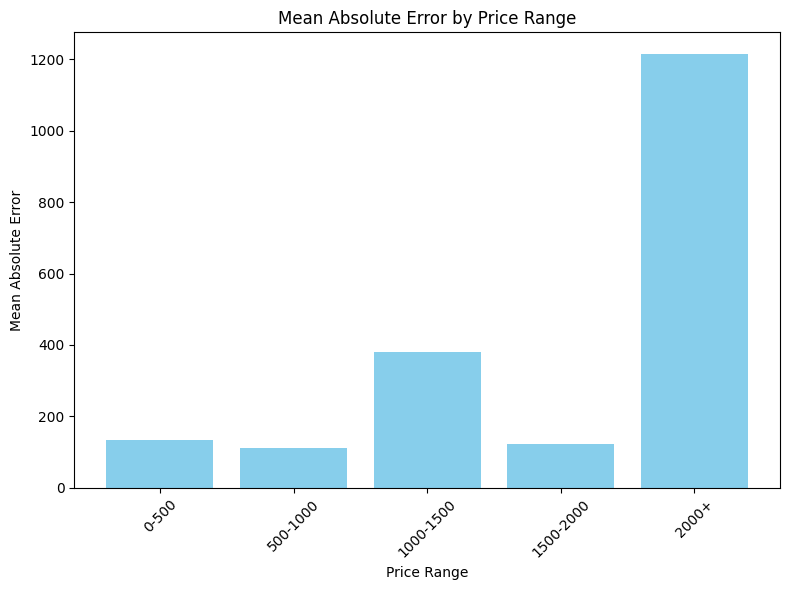

In [479]:
# Group predictions by price range
bins = [0, 500, 1000, 1500, 2000, max(y_test)]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000+']
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
errors = abs(residuals)
# Create a DataFrame with binned prices and errors
error_data = pd.DataFrame({'Price Range': y_test_binned, 'Absolute Error': errors})

# Calculate mean error for each price range
mean_errors = error_data.groupby('Price Range', observed=True)['Absolute Error'].mean().reset_index()

# Plot errors by price range
plt.figure(figsize=(8, 6))
plt.bar(mean_errors['Price Range'], mean_errors['Absolute Error'], color='skyblue')
plt.title('Mean Absolute Error by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar chart illustrates the Mean Absolute Error (MAE) for different price ranges of realSum. It shows that the error is relatively small for lower price ranges (0-500 and 500-1000), indicating that the model performs better in predicting more common, lower-priced listings. However, the error increases significantly in the higher price ranges, particularly for prices above 2000, where the MAE exceeds 1200. As we observed in the graph showing the distribution of samples, there are significantly fewer samples in the higher price ranges, which likely contributes to the lower accuracy in these areas due to insufficient data representation. Collecting more data for higher price ranges could potentially improve the model's accuracy in these segments, as it would provide better representation of premium property pricing trends.

### 4. Overestimation vs. Underestimation

Check whether the model tends to overestimate or underestimate prices.


In [480]:
# Calculate percentage of overestimations and underestimations
overestimation = residuals[residuals < 0].count() / len(residuals) * 100
underestimation = residuals[residuals > 0].count() / len(residuals) * 100

print(f"Overestimation Percentage: {overestimation:.2f}%")
print(f"Underestimation Percentage: {underestimation:.2f}%")


Overestimation Percentage: 72.85%
Underestimation Percentage: 27.15%


The error analysis shows that the model overestimates prices in 72.85% of the cases, meaning it predicts a price higher than the actual value. On the other hand, it underestimates prices in 27.15% of the cases, predicting a lower price than the actual value. This suggests the model has a tendency to overestimate property prices.
This can be due outliers, especially in higher-priced listings, could heavily influence the model's predictions. If the model overfits to these outliers, it might produce consistently inflated predictions for other samples.







### 5. Identify Problematic Features
Analyze the correlation between residuals and specific features to check if some features sabotage the model.

In [481]:
# Correlation of residuals with features
residual_corr = pd.concat([X_test, residuals.rename('Residuals')], axis=1).corr()['Residuals'].sort_values(ascending=False)
print("Correlation of Residuals with Features:")
print(residual_corr)


Correlation of Residuals with Features:
Residuals                     1.000000
attr_index                    0.305309
attr_index_norm               0.305309
bedrooms                      0.243166
rest_index_norm               0.224376
rest_index                    0.224376
guest_satisfaction_overall    0.203130
person_capacity               0.180516
host_is_superhost             0.107531
cleanliness_rating            0.079422
lng                           0.027401
biz                          -0.044905
lat                          -0.088170
room_shared                  -0.090408
room_type_Shared room        -0.090408
multi                        -0.091002
Unnamed:0                    -0.133315
dist                         -0.189853
metro_dist                   -0.197415
room_private                 -0.340992
room_type_Private room       -0.340992
Name: Residuals, dtype: float64


The analysis shows that room type and distance-related features play a significant role in the model’s prediction errors. For example, private rooms and properties farther from the city center tend to have smaller errors, while non-private rooms and properties closer to central locations show larger errors. On the other hand, features like cleanliness rating and longitude have only a minor impact on the errors. This suggests that improving how the model handles room type and distance features could help reduce errors and improve overall accuracy.
